# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Ana Javed

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [177]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Reading file into a Pandas Dataframe 
Auto = pd.read_csv(fileName)

# Some Exploratory Data Analysis 
print(Auto.describe()) # Summary Statistics

print(Auto.shape) # DF dimensions

Auto.head(5) # Top 5 rows


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [178]:
# Import libraries
import pandas as pd
import numpy as np 
from scipy import stats
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import numpy.random as nr

# Declaring inline visualizations 
%matplotlib inline


In [179]:
#### Creating New Column: Log Price

# Converting Unknown "?" Values in Price Column 
Auto.loc[:,'price'] = pd.to_numeric(Auto.loc[:,'price'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'price'])
Auto.loc[HasNan1,'price'] = np.nanmedian(Auto.loc[:,'price'])

## Creating New Log Price Column from Price Column
Auto.loc[:, "LogPrice"] = np.log(Auto.loc[:, "price"])

#### Verifying Output looks correct
# print(Auto.loc[:, "price"].value_counts()) 
# print(Auto.loc[:, "LogPrice"].value_counts()) 

Text(0.5, 0, 'Value')

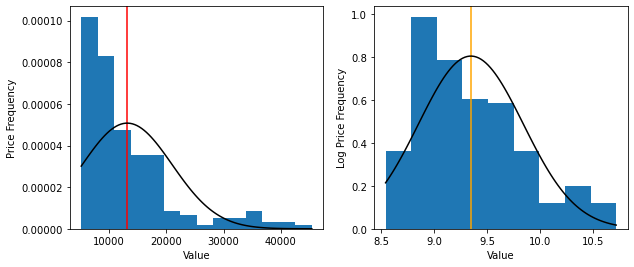

In [180]:
#### Creating a Histogram of Price and LogPrice Distributions 

plt.figure(figsize=(10, 9))

x = np.linspace(min(Auto.loc[:,'price']), max(Auto.loc[:,'price']), 100) #start, stop, num of samples 
x1 = np.linspace( min(Auto.loc[:,'LogPrice']), max(Auto.loc[:,'LogPrice']), 100) #start, stop, num of samples 

#### Testing Normality of Price Column 
plt.subplot(2, 2, 1) # The first plot # Rows, Column, Index 
plt.hist(Auto.loc[:,'price'], bins = "auto", density=True)
plt.axvline(mean(Auto.loc[:,'price']), color = 'red')

plt.plot(x, 
         norm.pdf(x, mean(Auto.loc[:,'price']), 
                  np.std(Auto.loc[:,'price'])), 
         color = 'black')

plt.ylabel('Price Frequency')
plt.xlabel('Value')


#### Testing Normality of Price Column 
plt.subplot(2,2, 2) # The next plot # nrows=1, ncols=1,
plt.hist(Auto.loc[:,'LogPrice'], bins = "auto", density=True)
plt.axvline(mean(Auto.loc[:,'LogPrice']), color = 'Orange')

plt.plot(x1, 
         norm.pdf(x1, mean(Auto.loc[:,'LogPrice']), 
                      np.std(Auto.loc[:,'LogPrice'])), 
         color = 'black')

plt.ylabel('Log Price Frequency')
plt.xlabel('Value')



### Histogram Plot Explanation

The left plot is a histogram the Automobile Price column. As we see, the mean is around 13150 and the data appears to be skewed to the right of the mean. The black line is a normal curve laid ontop of the distribution. It is cutoff on the left side. 

The right plot is a histogram the Automobile LogPrice column. As we see, the mean is around 9.3 and the data also appears to be skewed to the right of the mean. This distribution appears closer to a normal distribution, since the normal curve laid ontop of it is nearly a complete bell curve - but let's verify with statistics from conducting a t-test. 

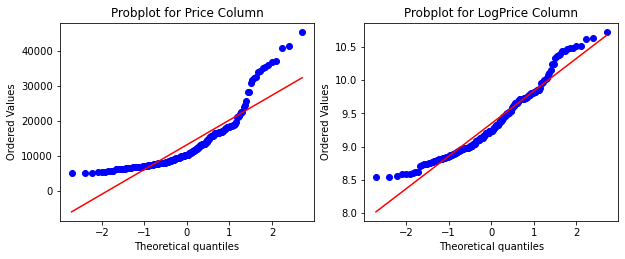

In [181]:
#### Creating a Q-Q Plot for a Normal Distribution

def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    
    plt.figure(figsize=(10, 8)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1, dist ='norm') ## Plot the left subplot
    ax1.set_title("Probplot for Price Column")
    
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1, dist = 'norm') ## Plot the right subplot
    ax1.set_title("Probplot for LogPrice Column")
    
    
qq_plot(Auto.loc[:, 'price'], Auto.loc[:, 'LogPrice'])    


In [182]:
### Calculating the KS Statistics to exactly Measure the Maximum Distance 

In [189]:
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    from sklearn.preprocessing import scale
    
    ks_statisic, pvalue = kstest(scale(dat), dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
  

print("---- Price Column (After Normalizing): ----")
ks_test(Auto.loc[:, 'price'])  
print("\n")

print("---- LogPrice Column (After Normalizing): ----")
ks_test(Auto.loc[:, 'LogPrice'])  



---- Price Column (After Normalizing): ----
KS-statistic = 0.160931935149899
P-value = 4.174734746658962e-05


---- LogPrice Column (After Normalizing): ----
KS-statistic = 0.09982085789407613
P-value = 0.031318982399451856


### KS Statistic & P-value Analysis

For the Price column, we see that the KS statistic is small, and the P value is quite small. 

For the LogPrice column, we see that the KS statistic is smaller than the Price column, and the P value is small, but larger than the Price column's P value. 

When compared to each other (and assuming alpha = 0.05 or cutoff is 5%), each P-value is small enough to reject the null hypothesis that these distributions are the same as a normal distribution. 

When comparing the KS-statistic, which measures the maximum distance between the two cumulative density functions, the Price column has a larger value than LogPrice column. This means that there is a bigger difference in the Price column, so LogPrice column is closer to a normal distribution.

In [206]:
## Welche's test for paired data
def t_test_paired(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_rel(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
## Function to Plot T-Tests 
def plot_t(a, b, t_test, cols=['A', 'B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
## Function for Non-paired T Tests
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

In [207]:
# print(Auto.describe()) 
# print(Auto.shape)
Auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,LogPrice
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,9.510075
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,9.711116
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,9.711116
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.543235
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,9.767095


DegFreedom    23.423234
Difference    -0.232111
Statistic     -2.017983
PValue         0.055188
Low95CI       -0.469812
High95CI       0.005591
dtype: float64


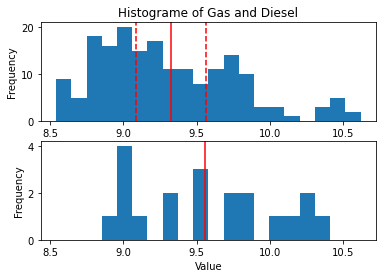

In [215]:
""" Test significance of price (or log price) stratified by a) fuel type, 
b) aspiration, and c) rear vs. front wheel drive.  
Use both graphical methods and the formal test. """

## Paired T-Test LogPrice & Fuel-type

# print(Auto.loc[:, "fuel-type"].value_counts())
    # gas       185
    # diesel     20

gas = Auto.loc[Auto.loc[:, 'fuel-type'] == 'gas', 'LogPrice']
diesel = Auto.loc[Auto.loc[:, 'fuel-type'] == 'diesel', 'LogPrice']

Fuel_type = t_test(gas, diesel, alpha = 0.05)
print(Fuel_type)

plot_t(gas, diesel, Fuel_type, cols=["Gas", "Diesel"]) 

DegFreedom    66.240183
Difference    -0.326451
Statistic     -4.416153
PValue         0.000038
Low95CI       -0.474032
High95CI      -0.178871
dtype: float64


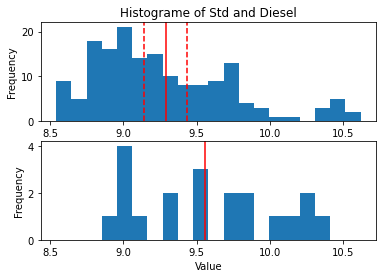

In [216]:
## Paired T-Test LogPrice & Aspiration 
# test = t_test(Auto.loc[:,'LogPrice'], Auto.loc[:,'aspiration'], 0.05)


# print(Auto.loc[:, "aspiration"].value_counts())
#     # std      168
#     # turbo     37

std = Auto.loc[Auto.loc[:, 'aspiration'] == 'std', 'LogPrice']
turbo = Auto.loc[Auto.loc[:, 'aspiration'] == 'turbo', 'LogPrice']

Aspiration_type = t_test(std, turbo, alpha = 0.05)
print(Aspiration_type)

plot_t(std, diesel, Aspiration_type, cols=["Std", "Diesel"]) 


DegFreedom    1.240960e+02
Difference   -7.075543e-01
Statistic    -1.217148e+01
PValue        6.500851e-23
Low95CI      -8.226133e-01
High95CI     -5.924954e-01
dtype: float64


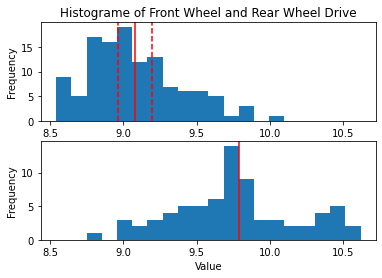

In [219]:
## Paired T-Test LogPrice & Drive-wheels  

# print(Auto.loc[:, "drive-wheels"].value_counts())
    # fwd    120
    # rwd     76
    # 4wd      9

fwd = Auto.loc[Auto.loc[:, 'drive-wheels'] == 'fwd', 'LogPrice']
rwd = Auto.loc[Auto.loc[:, 'drive-wheels'] == 'rwd', 'LogPrice']

Drive_Wheels_type = t_test(fwd, rwd, alpha = 0.05)
print(Drive_Wheels_type)

plot_t(fwd, rwd, Drive_Wheels_type, cols=["Front Wheel", "Rear Wheel Drive"]) 


In [ ]:
## Analysis of the two sided t-test 

